# Some attempt at Particle Tracking

In [163]:
# Importing things

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq

In [164]:
# where is the data?
loc = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/2024-03-11/'
filename = 'Results.csv'

# read in as dataframe
df = pd.read_csv(loc + filename)

# select x and y positions of bead for all 83 frames
# get rid of anomalous last point
x = np.array(df['x'])[:-1]
y = np.array(df['y'])[:-1]

In [165]:
# Conversion Factor
pixels_microns = 15.36

x_mic = x*(1/pixels_microns)
y_mic = y*(1/pixels_microns)

Text(0, 0.5, 'y / Microns')

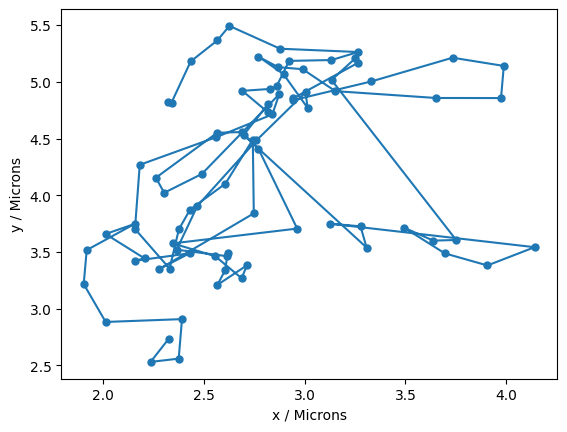

In [166]:
# Plot x and y trajectory

plt.errorbar(x_mic,y_mic, ms = 5, fmt = 'o', linestyle = '-')
plt.xlabel('x / Microns')
plt.ylabel('y / Microns')

Text(0, 0.5, 'Position / Microns')

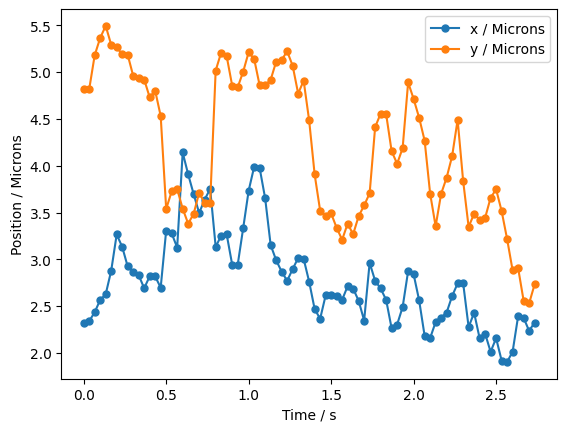

In [167]:
# Frames per second on camera
fps = 30
fps_err = 1

# Set time axis in seconds
time = np.arange(x.size) / 30

# plot x and y over time
plt.errorbar(time,x_mic, ms = 5, fmt = 'o', linestyle = '-', label = 'x / Microns')
plt.errorbar(time,y_mic, ms = 5, fmt = 'o', linestyle = '-', label = 'y / Microns')
plt.legend()
plt.xlabel('Time / s')
plt.ylabel('Position / Microns')

Text(0, 0.5, 'Position around zero / Microns')

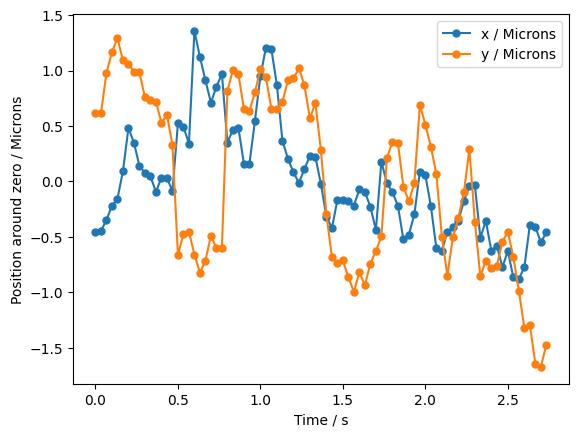

In [168]:
# Find mean of particle tracks to centre data on zero
x_mean = np.mean(x_mic)
y_mean = np.mean(y_mic)

# Subtract mean from data
x_mic0 = x_mic - x_mean
y_mic0 = y_mic - y_mean

# plot x and y over time
plt.errorbar(time,x_mic0, ms = 5, fmt = 'o', linestyle = '-', label = 'x / Microns')
plt.errorbar(time,y_mic0, ms = 5, fmt = 'o', linestyle = '-', label = 'y / Microns')
plt.legend()
plt.xlabel('Time / s')
plt.ylabel('Position around zero / Microns')

Text(0, 0.5, 'Fourier Transform Squared / Arb Units')

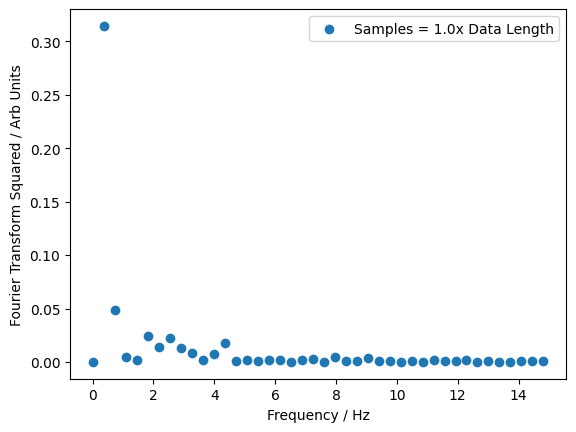

In [169]:
data = x_mic0
sample_number = 1*x_mic0.size

# Compute transform and normalise by length / 2
fast_four = rfft(data, n = sample_number) / (len(data) / 2)

# Compute amplitude squared
ps = np.abs(fast_four)**2

# Calculate frequency components (is the sample spacing right?)
freq = rfftfreq(sample_number, d=1.0/fps)

# Plot using above function
plt.scatter(freq, ps, label = 'Samples = {}x Data Length'.format(sample_number / x.size))
plt.legend()
plt.xlabel('Frequency / Hz')
plt.ylabel('Fourier Transform Squared / Arb Units')

C:\Users\abiga\AppData\Local\Temp\ipykernel_19112\2688005761.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10e-7,0)


(1e-06, 10.898721988339869)

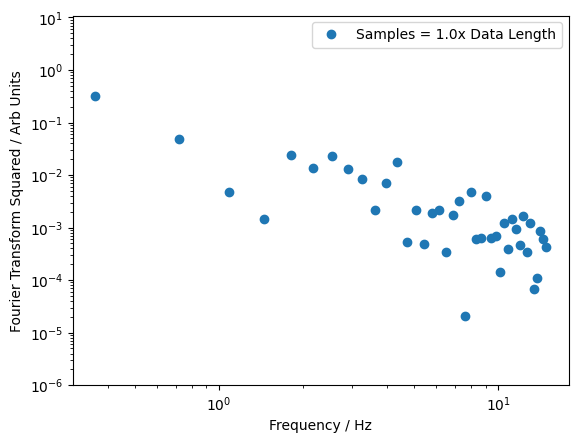

In [176]:
# Use a log scale
plt.loglog(freq, ps, label = 'Samples = {}x Data Length'.format(sample_number / x.size), linestyle = '', marker = 'o')
plt.legend()
plt.xlabel('Frequency / Hz')
plt.ylabel('Fourier Transform Squared / Arb Units')
plt.ylim(10e-7,0)